<a href="https://colab.research.google.com/github/tomfox1/DS-Unit-2-Sprint-2-Regression/blob/master/module1-ols-regression/%20Copy_of_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
%matplotlib inline
from ipywidgets import interact
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='price')
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17290, 20) (4323, 20) (17290,) (4323,)


In [0]:
features = 'bedrooms'

target = 'price'

X = X_train[features]
y = y_train

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     1815.
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:29:17   Log-Likelihood:            -2.4495e+05
No. Observations:               17290   AIC:                         4.899e+05
Df Residuals:                   17288   BIC:                         4.899e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.348e+05   9812.284     13.740      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
model = LinearRegression()

X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

model.fit(X, y)

model.coef_, model.intercept_

(array([[119634.32393857]]), array([134823.86896687]))

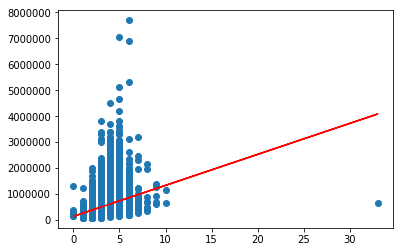

In [0]:
y_pred = model.predict(X)

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X, y_pred, color="red");

In [0]:
root_mean_squared_error = (mean_squared_error(y, y_pred))**(1/2)
root_mean_squared_error

343851.2080443778

In [0]:
r2_score(y, y_pred)

0.095025581383548

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [0]:
features = ['bedrooms', 'bathrooms']

target = 'price'

XX = X_train[features]
y1 = y_train

model = sm.OLS(y, sm.add_constant(XX))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     3348.
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:31:21   Log-Likelihood:            -2.4298e+05
No. Observations:               17290   AIC:                         4.860e+05
Df Residuals:                   17287   BIC:                         4.860e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.686e+04   9089.131     -2.956      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
model = LinearRegression()
model.fit(XX, y)

y_pred1 = model.predict(XX)

model.coef_, model.intercept_

(array([ 19504.43480388, 236039.73354932]), -26864.85677833995)

In [0]:
root_mean_squared_error = (mean_squared_error(y1, y_pred1))**(1/2)
root_mean_squared_error, r2_score(y1, y_pred1)

(306877.7429178876, 0.279181413460015)

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
features = ['bedrooms', 'sqft_living', 'sqft_lot',	'floors',	'waterfront',	'view',	'condition',	'grade',	'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated',	'zipcode',	'lat',	'long',	'sqft_living15',	'sqft_lot15']

target = 'price'

Xm = X_train[features]
y2 = y_train

model = sm.OLS(y2, sm.add_constant(Xm))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2477.
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:31:40   Log-Likelihood:            -2.3550e+05
No. Observations:               17290   AIC:                         4.710e+05
Df Residuals:                   17273   BIC:                         4.712e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.174e+06   3.26e+06      1.896

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
model = LinearRegression()
model.fit(Xm, y)

y_pred2 = model.predict(Xm)

model.coef_, model.intercept_

(array([-2.91651397e+04,  1.22637815e+02,  9.22314866e-02,  2.00401752e+04,
         5.64586911e+05,  5.40674438e+04,  2.66726121e+04,  9.69490934e+04,
         7.21757934e+01,  5.04620213e+01, -2.35841417e+03,  2.70669514e+01,
        -5.60228096e+02,  5.98942046e+05, -1.98462732e+05,  1.97538447e+01,
        -3.50033216e-01]), 6174181.460823202)

In [0]:
root_mean_squared_error = (mean_squared_error(y2, y_pred2))**(1/2)
root_mean_squared_error, r2_score(y2, y_pred2)

(199145.93368565553, 0.6964445181277841)

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
